Presented By:
    Harikrishnan M

<h1 style="text-align: center;"><span style="color:red;">Problem Statement</span></h1>

<h3 style="text-align: left;"><span style="color:black;">Problem Statement</span></h3><br>
You have been provided with a dataset containing information about loan applicants. Your task is to use clustering techniques to identify distinct groups or segments within the dataset based on various features. This segmentation can help in understanding different types of loan applicants and their characteristics, which can be used to develop targeted strategies and policies for loan approval.

<h3 style="text-align: left;"><span style="color:black;">Feature Explanation: </span></h3>

Loan_ID: A unique identifier for each loan applicant.<br>
Gender: The gender of the applicant (e.g., Male, Female).<br>
Married: Whether the applicant is married or not (e.g., Yes, No).<br>
Dependents: The number of dependents the applicant has (e.g., 0, 1, 2+).<br>
Education: The level of education of the applicant (e.g., Graduate, Not Graduate).<br>
Self_Employed: Whether the applicant is self-employed or not (e.g., Yes, No).<br>
ApplicantIncome: The income of the applicant.<br>
CoapplicantIncome: The income of the co-applicant, if any.<br>
LoanAmount: The amount of loan requested by the applicant.<br>
Loan_Amount_Term: The term (in months) of the loan.<br>
Credit_History: The credit history of the applicant (e.g., 1 - Good, 0 - Bad).<br>
Property_Area: The type of property area where the applicant resides (e.g., Urban, Rural, Semiurban).<br>
Loan_Status: The final status of the loan application (e.g., Approved, Not Approved).<br>

These features provide important information about the loan applicants, including their demographic details, financial information, credit history, and property area. Clustering algorithms can be applied to these features to identify groups of applicants with similar characteristics, which can aid in developing targeted loan approval strategies and understanding the factors influencing loan decisions.3

<h2 style="text-align: center;"><span style="color:red;">Importing Libraries</span></h2>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


<h2 style="text-align: center;"><span style="color:red;">Data Preprocessing & EDA</span></h2>

In [2]:
df= pd.read_csv(r"C:\Users\harik\Desktop\All Folder\PGDA\SEM 2\Machine Learning\Unsupervised algorithm\Clustering\Kmeans\Default\clustering.csv")

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [8]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,381.000000,381.000000,381.000000,370.000000,351.000000
mean,3579.845144,1277.275381,104.986877,340.864865,0.837607
std,1419.813818,2340.818114,28.358464,68.549257,0.369338
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2600.000000,0.000000,90.000000,360.000000,1.000000
50%,3333.000000,983.000000,110.000000,360.000000,1.000000
75%,4288.000000,2016.000000,127.000000,360.000000,1.000000
max,9703.000000,33837.000000,150.000000,480.000000,1.000000


In [4]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
#selecting only numerical columns
num_df = df.select_dtypes(exclude='object')
num_df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,4583,1508.0,128.0,360.0,1.0
1,3000,0.0,66.0,360.0,1.0
2,2583,2358.0,120.0,360.0,1.0
3,6000,0.0,141.0,360.0,1.0
4,2333,1516.0,95.0,360.0,1.0


In [6]:
num_df.isnull().sum()

ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
dtype: int64

### We are imputing the miss values using iterative imputer

In [7]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(verbose = 1)

In [14]:
num_df_c = num_df

In [9]:
imp.fit(num_df)

[IterativeImputer] Completing matrix with shape (381, 5)
[IterativeImputer] Change: 28.498471498655306, scaled tolerance: 33.837 
[IterativeImputer] Early stopping criterion reached.


IterativeImputer(verbose=1)

In [10]:
num_df_imp = imp.transform(num_df)

[IterativeImputer] Completing matrix with shape (381, 5)


In [12]:
num_df_demo = pd.DataFrame(num_df_imp,columns = num_df.columns)

In [15]:
num_df = num_df_demo.copy(deep=True)

In [16]:
num_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,381.000000,381.000000,381.000000,381.000000,381.000000
mean,3579.845144,1277.275381,104.986877,340.758049,0.837572
std,1419.813818,2340.818114,28.358464,67.591604,0.354470
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2600.000000,0.000000,90.000000,360.000000,1.000000
50%,3333.000000,983.000000,110.000000,360.000000,1.000000
75%,4288.000000,2016.000000,127.000000,360.000000,1.000000
max,9703.000000,33837.000000,150.000000,480.000000,1.000000


In [18]:
num_df.isnull().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64

<AxesSubplot:>

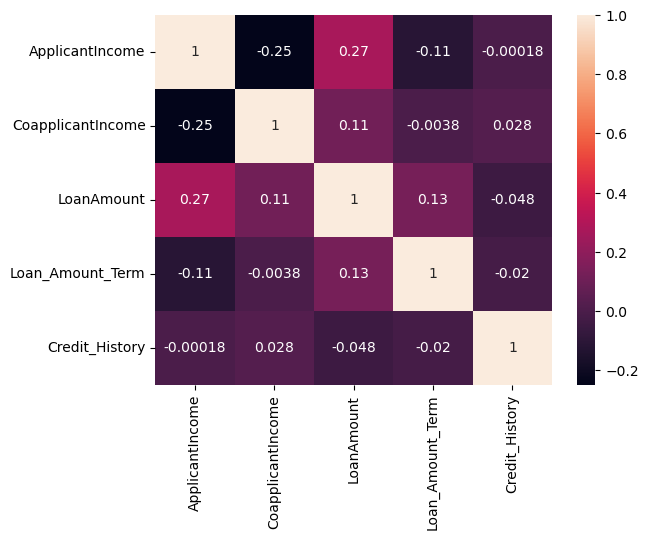

In [33]:
sns.heatmap(num_df.corr(),annot=True)

In [34]:
num_df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,4583.0,1508.0,128.0,360.0,1.0
1,3000.0,0.0,66.0,360.0,1.0
2,2583.0,2358.0,120.0,360.0,1.0
3,6000.0,0.0,141.0,360.0,1.0
4,2333.0,1516.0,95.0,360.0,1.0


Now we are combining applicant income and coapplicant income

In [36]:
num_df['Total_income'] = num_df.ApplicantIncome + num_df.CoapplicantIncome

In [37]:
num_df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Total_income
0,4583.0,1508.0,128.0,360.0,1.0,6091.0
1,3000.0,0.0,66.0,360.0,1.0,3000.0
2,2583.0,2358.0,120.0,360.0,1.0,4941.0
3,6000.0,0.0,141.0,360.0,1.0,6000.0
4,2333.0,1516.0,95.0,360.0,1.0,3849.0


<AxesSubplot:xlabel='ApplicantIncome', ylabel='LoanAmount'>

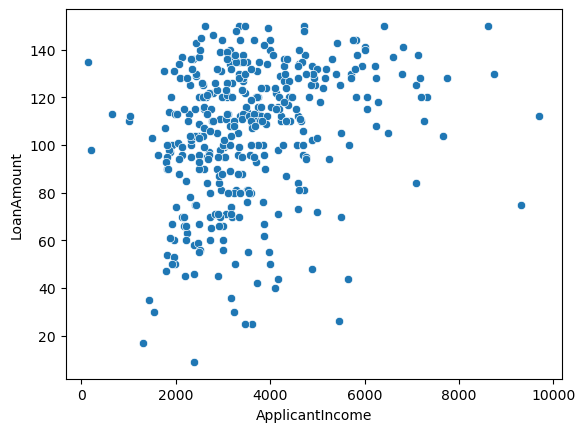

In [38]:
sns.scatterplot(x='ApplicantIncome'	, y= 'LoanAmount', data= num_df)

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='LoanAmount'>

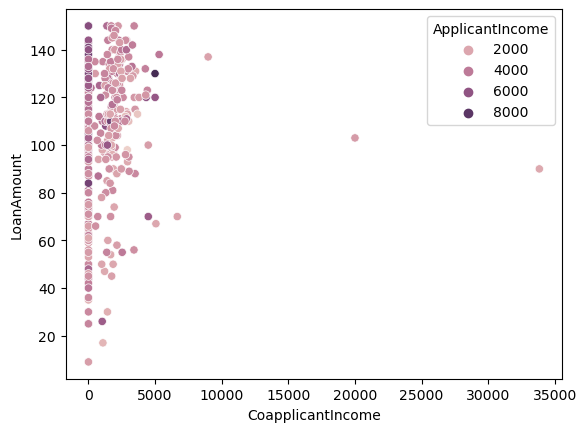

In [41]:
sns.scatterplot(x='CoapplicantIncome'	, y= 'LoanAmount', data= num_df,hue ='ApplicantIncome')

<AxesSubplot:xlabel='Total_income', ylabel='LoanAmount'>

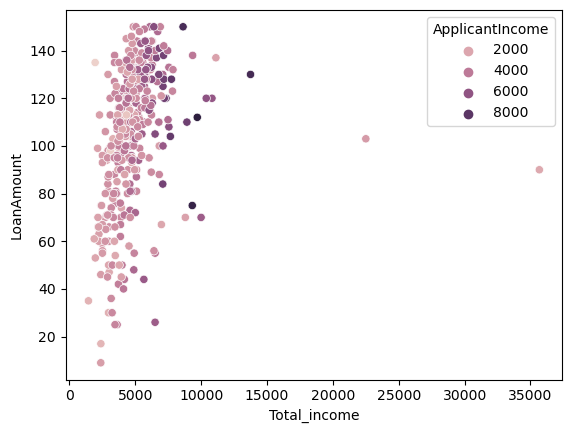

In [42]:
sns.scatterplot(x='Total_income', y= 'LoanAmount', data= num_df,hue ='ApplicantIncome')

<h2 style="text-align: center;"><span style="color:red;">Clustering</span></h2>

In [43]:
num_df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Total_income
0,4583.0,1508.0,128.0,360.0,1.0,6091.0
1,3000.0,0.0,66.0,360.0,1.0,3000.0
2,2583.0,2358.0,120.0,360.0,1.0,4941.0
3,6000.0,0.0,141.0,360.0,1.0,6000.0
4,2333.0,1516.0,95.0,360.0,1.0,3849.0


In [44]:
num_df.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Total_income'],
      dtype='object')

In [45]:
num_df = num_df.reindex(columns=['ApplicantIncome', 'CoapplicantIncome', 'Total_income', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'])

In [46]:
num_df.head()

,ApplicantIncome,CoapplicantIncome,Total_income,LoanAmount,Loan_Amount_Term,Credit_History
0,4583.0,1508.0,6091.0,128.0,360.0,1.0
1,3000.0,0.0,3000.0,66.0,360.0,1.0
2,2583.0,2358.0,4941.0,120.0,360.0,1.0
3,6000.0,0.0,6000.0,141.0,360.0,1.0
4,2333.0,1516.0,3849.0,95.0,360.0,1.0


In [47]:
num_df.Credit_History.value_counts()

1.00    294
0.00     57
0.89      3
0.96      3
0.82      2
0.98      2
0.84      2
0.93      2
0.99      2
0.95      2
0.91      1
0.75      1
0.45      1
0.66      1
0.64      1
0.72      1
0.47      1
0.94      1
0.76      1
0.86      1
0.97      1
0.74      1
Name: Credit_History, dtype: int64

In [50]:
num_df.loc[num_df.Credit_History >.5,'Credit_History'] = 1

In [51]:
num_df.Credit_History.value_counts()

1.00    322
0.00     57
0.45      1
0.47      1
Name: Credit_History, dtype: int64

In [52]:
num_df.loc[num_df.Credit_History < .5,'Credit_History'] = 0

In [53]:
num_df.Credit_History.value_counts()

1.0    322
0.0     59
Name: Credit_History, dtype: int64

In [54]:
num_df.head()

,ApplicantIncome,CoapplicantIncome,Total_income,LoanAmount,Loan_Amount_Term,Credit_History
0,4583.0,1508.0,6091.0,128.0,360.0,1.0
1,3000.0,0.0,3000.0,66.0,360.0,1.0
2,2583.0,2358.0,4941.0,120.0,360.0,1.0
3,6000.0,0.0,6000.0,141.0,360.0,1.0
4,2333.0,1516.0,3849.0,95.0,360.0,1.0


In [55]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [58]:
X = num_df[['LoanAmount','Total_income']]

In [66]:
k_value = [ 2,3,4,5]
sil_score = []
for k in k_value:
    km= KMeans(n_clusters=k, random_state = 1)
    km.fit(X)
    score= silhouette_score(num_df, labels = km.labels_, metric='euclidean')
    sil_score.append(score)

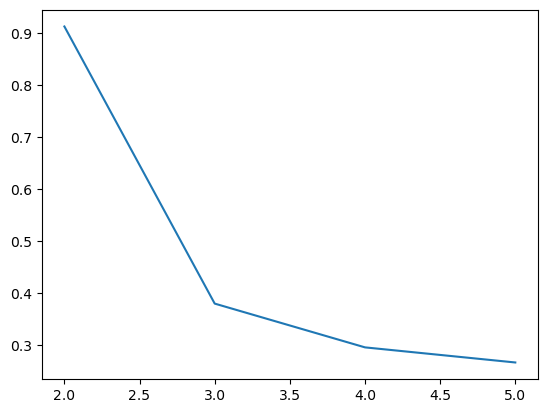

In [63]:
plt.plot(k_value, sil_score)

Now from this we are selecting the k as 3

In [70]:
num_df.drop('cluster',axis=1,inplace=True)

In [74]:
# Final Model

km = KMeans(n_clusters=3, random_state=1)
km.fit(num_df)

KMeans(n_clusters=3, random_state=1)

In [75]:
# Final Model

num_df['cluster'] = km.labels_

In [76]:
num_df.head()

,ApplicantIncome,CoapplicantIncome,Total_income,LoanAmount,Loan_Amount_Term,Credit_History,cluster
0,4583.0,1508.0,6091.0,128.0,360.0,1.0,1
1,3000.0,0.0,3000.0,66.0,360.0,1.0,0
2,2583.0,2358.0,4941.0,120.0,360.0,1.0,0
3,6000.0,0.0,6000.0,141.0,360.0,1.0,1
4,2333.0,1516.0,3849.0,95.0,360.0,1.0,0


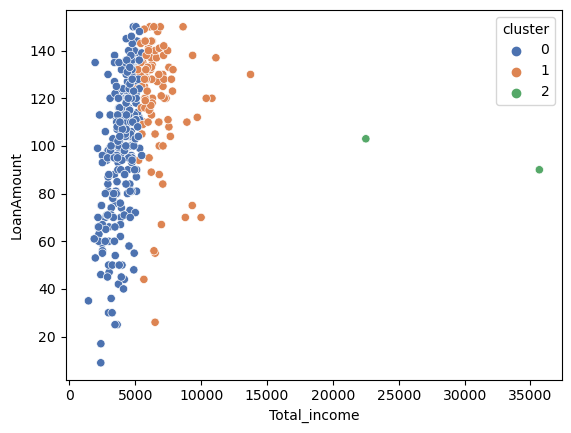

In [79]:
sns.scatterplot(x='Total_income', y='LoanAmount', hue='cluster', data=num_df, palette = 'deep')
plt.show()

From this we identified that our clustering process was efficient

# END